In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

### Chi Squared Distribution Properties 

#### 1. As the degrees of freedom of a Chi Square distribution increase, the Chi Square distribution begins to look more and more like a normal distribution.

#### 2. The mean of a Chi Square distribution is its degrees of freedom.

#### 3. The variance is equal to two times the number of degrees of freedom: σ2 = 2 * df

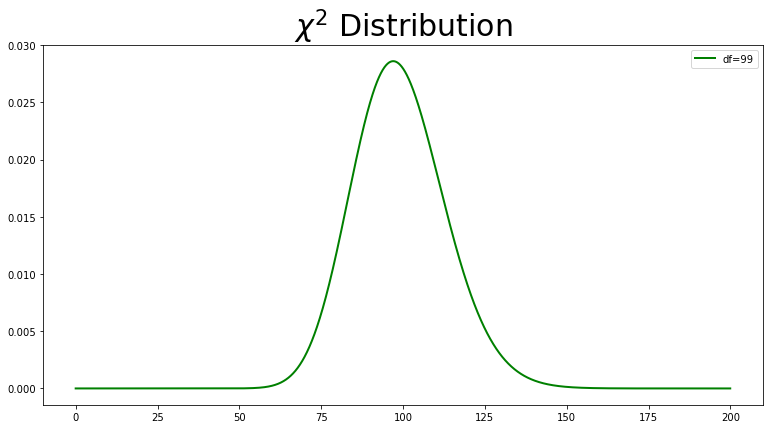

In [13]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 200, .05)
ax_1.plot(x, stats.chi2.pdf(x, 99), color="green", lw=2, label="df=99")

ax_1.set_title(r"$\chi^2$ Distribution", fontsize=30)

plt.legend()
plt.show()

We recently learned about Chi Squared Distribution. Previously, we have looked at how Chi Square distribution is contructed from Z distribution. 

Now, we are going to look at how Chi Squared Distribution could be used.

One thing I recently learned is that a sampling distribution of sample variance will have Chi Squared Distribution. This is so cool! So we are going to construct them and see if that actually works. But one thing to notice is that a population that we draw samples from should be normally distributed.   


In [62]:
np.random.seed(1)

pop_size = 10000
sample_size = 100

## Generating a normally distributed population with mean, 0 and variance, 1. 
pop = np.random.normal(0, 1, size=pop_size)

## Taking 10,000 samples and collecting sample variances. 
sample_var_list = [] 
for i in range(10000):
    inx = np.random.randint(pop_size, size=sample_size)
    sample = pop[inx]
    sample_var = statistics.variance(sample) 
    sample_var_list.append(sample_var)

Let's quickly check the mean and the variance of sample variances. 

In [63]:
print("mean: " + str(statistics.mean(sample_var_list)))
print("variance: " + str(statistics.pvariance(sample_var_list)))

mean: 0.9967093838016289
variance: 0.02034720715110557


Okay, Cool! I got something close to 1 for the expected value. This was expected, because expectation of sample variances is the population variance. But, for the variance, there is a formula that I haven't understood yet. That formula is provided below. I'll take care of that if time allows. **But what I know for now is that the variance of sample variance goes to zero as n goes to infinity. (This is not a fact, but what I just inferred.)**

<div class="alert alert-block alert-danger">
<b>Warning:</b> I still need to prove this.</div>

#### From Reference #1
Given n sample values, the true variance of the sample variance is 

$Var(S_n^2) = (k - \frac{n-3}{n-1})\frac{\sigma^4}{n}$

where $\sigma^2$ is the true variance and $k$ is the true kurtosis of the underlying distribution for the sample values. 

**reference #1:** https://stats.stackexchange.com/questions/290822/how-to-estimate-variance-of-sample-variance

#### From Reference #2

$Var(S^2) = \frac{\mu_4}{n}-\frac{\sigma^4(n-3)}{n(n-1)}$

Here $\mu_4 = E[(X-\mu)^4]$ is the fourth central moment of X. 

**reference #2:** https://math.stackexchange.com/questions/72975/variance-of-sample-variance

## Now, we are going to make sample variances into Chi Squared Statistics. 

Because Chi Squared Statistics follow Chi Squared distribution, and we would like to change this sampling distribution of sample varainces into Chi Squared distribution for statistical purposes. 

$\chi^2 = (n-1) \cdot \frac{S^2}{\sigma^2}$

 - where $(n-1)$ is degrees of freedom, 
 - $S^2$ is a variance of a sample,
 - and $\sigma^2$ is a variance of a population that we take samples from. 

In [111]:
df = (sample_size-1)
pop_var = statistics.pvariance(pop)

chi2_stat = np.dot(df,sample_var_list)/pop_var

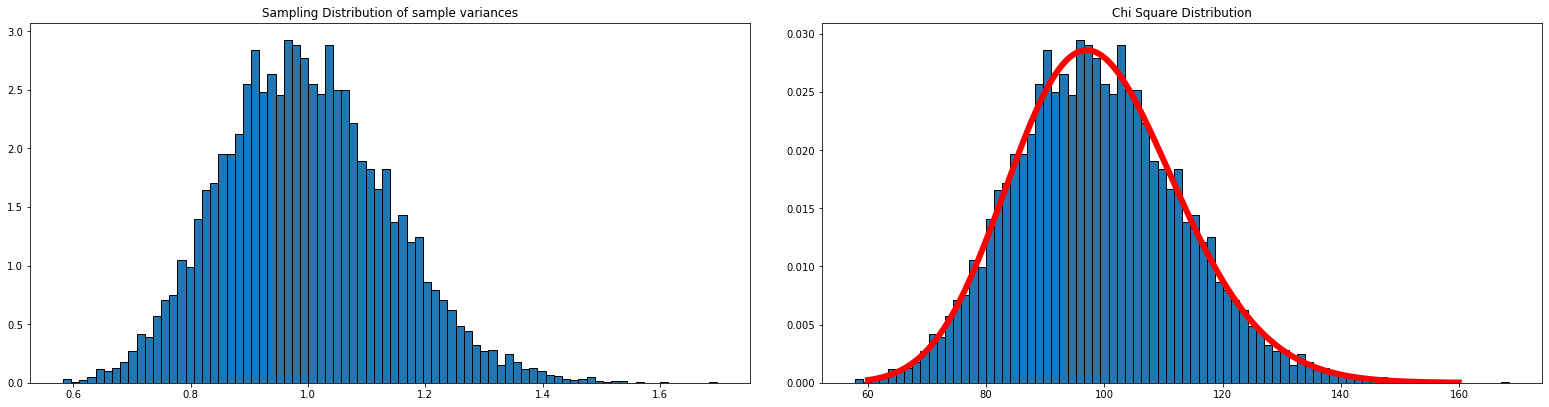

In [118]:
fig = plt.figure(figsize=(10,5))
ax_0 = fig.add_axes([0,0,1,1])
ax_1 = fig.add_axes([1.1,0,1,1])

x = np.arange(60, 160, .05)

ax_0.hist(sample_var_list, bins=80, density=True, ec="black")
ax_0.set_title("Sampling Distribution of sample variances")


ax_1.hist(chi2_stat, bins=80, density=True, ec="black")
ax_1.set_title("Chi Square Distribution")
ax_1.plot(x, stats.chi2.pdf(x,df), color="red", lw=6)

plt.show()

We plot sampling distribution of sample variances, it would look something like this on the left. And if we change all the values of sample variance into Chi Square statistics and plot them, it would look something like this on the right. 

**Properties of $\chi^2$**

I have already mentioned these. 

1. $E[\chi_i^2] = (n-1) = df$

 - $= (n-1) \cdot E[\frac{S_{x,i}^2}{\sigma_x^2}] = (n-1)$


<div class="alert alert-block alert-danger">
<b>Warning:</b> I still need to prove this.</div>

2. $Var(\chi_i^2) = 2 \cdot (n-1) = 2 \cdot df$

**reference for the proof:** https://stats.stackexchange.com/questions/172559/proof-of-variance-formula-for-central-chi-squared-distribution

In [129]:
print("The expectation of Chi Squared statistic is", str(np.mean(chi2_stat)))
print("The variance of Chi Squared statistic is", str(statistics.pvariance(chi2_stat)))
print()
print("Good! This is what we expected as above.")

The expectation of Chi Squared statistic is 98.91427796922808
The variance of Chi Squared statistic is 200.39444695330735

Good! This is what we expected as above.


#### Usage of Chi Sqaured Distribution.

We can use this Chi Squared Distribution to run hypothesis testing for varaince. 

Say we have 0.8 for sample variance with a sample size of 100. And we hypothesize that the true variance is 1.2. 

$s^2 = 0.8$

$N = 100$

$H_0: \sigma^2 = 1.2$

Then we get 39.6 for $\chi^2$ statistic.

$\chi^2 = (100-1) \cdot \frac{0.8}{1.2}$

$\chi^2 = 66$

In [146]:
print((99*0.8)/1.2)

66.0


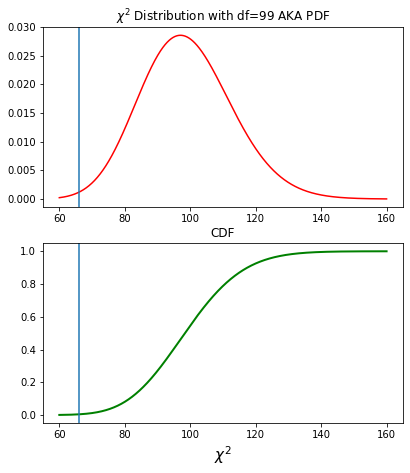

In [174]:
fig = plt.figure(figsize=(10,5))
x = np.arange(60, 160, .05)

ax_1 = fig.add_axes([0,0,0.5,0.5])
ax_0 = fig.add_axes([0,0.6,0.5,0.5])

ax_0.plot(x, stats.chi2.pdf(x,99), color="red")
ax_0.set_title(r"$\chi^2$ Distribution with df=99 AKA PDF")
ax_0.axvline(66)


ax_1.set_title("CDF")
ax_1.set_xlabel(r"$\chi^2$", size=15)
ax_1.plot(x, stats.chi2.cdf(x, df=99), color="green", lw=2, label="df=6")
ax_1.axvline(66)

plt.show()

In [158]:
## ppf is percentile point function. It is inverse of CDF. 
## If I put percentage as an input, it gives the point on the x-axis which it aligns with the percentage. 
stats.chi2.ppf(0.05,df=99)

77.04633186376029

If we were to run two-tailed test with significance level of 10%, then each tail gets 5%. That means we reject the null hypothesis if chi squared statistic falls below 77 on the left tail. And we got 66 for the statistic. So we reject the null hypothesis.  

#### Another usuage of $\chi^2$ Distribution


Problem #2 of this link: https://stattrek.com/probability-distributions/chi-square.aspx

Problem #2 talks about quality control. Chi Squared test could also be used to know the probability of getting sample variance that is higher than certain value. This is plausible only if we know the true variance of the population. Knowing the population variance is possible if we can do total inspection. 

#### Appendix

1. This website is a super helpful for understanding Chi Squared Distribution: https://stattrek.com/probability-distributions/chi-square.aspx

2. This Penn State Website has some good stuff too: https://online.stat.psu.edu/stat414/lesson/26/26.3

3. One more additional site: https://www.csus.edu/indiv/j/jgehrman/courses/stat50/samplingdists/7samplingdist.htm#samplevariance